In [1]:
import pandas as pd
#Load the dataset
pima = pd.read_csv("diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
#Split the dataset in features and target variable.
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = pima[feature_cols] #features
y = pima.Outcome #target variable

In [7]:
#split the dataset into training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 0)

#Here,the dataset is broken into two parts in a ratio of 75:25.It means 75% data will be used for model training and 25% for model testing

In [8]:
#import the class
from sklearn.linear_model import LogisticRegression
#instantiate the model with default parameters
logreg = LogisticRegression()
#fit the model with data
logreg.fit(X_train,y_train)
y_predict = logreg.predict(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [9]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_predict)
cnf_matrix

array([[119,  11],
       [ 26,  36]], dtype=int64)

In [10]:
#confusion matrix evaluation metrics
print("Accuracy:",metrics.accuracy_score(y_test,y_predict))
print("Precision:",metrics.precision_score(y_test,y_predict))
print("Recall:",metrics.recall_score(y_test,y_predict))

Accuracy: 0.8072916666666666
Precision: 0.7659574468085106
Recall: 0.5806451612903226


Precision :Precision is about being precise i.e.,how accurate your model is.In other words,you can say when a model makes a prediction,how often it is correct.

Recall :If there are patients who have diabetes in test set and how your Logistic Regression model can identify (58%) of the time.

Here,you can see the confusion matrix in the form of array object,with the dimensions 2*2 as it comes under binary classification,we have two classes 0 and 1.Diagonal values represent accurate predictions,while non-diagonal elements represent inaccurate predictions.

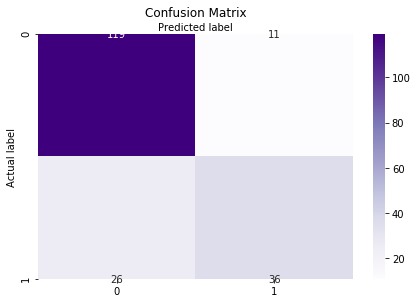

In [14]:
#import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names = [0,1] #names of classes
fig,ax = plt.subplots()
tick_marks =np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix),annot = True,cmap = 'Purples',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel("Predicted label")
plt.ylabel("Actual label")
plt.title("Confusion Matrix")
plt.show()

ROC Curve shows the tradeoff between sensitivity and specificity

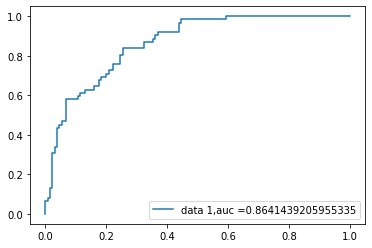

In [18]:
y_predict_proba = logreg.predict_proba(X_test)[::,1]
fpr,tpr,_= metrics.roc_curve(y_test,y_predict_proba)
auc = metrics.roc_auc_score(y_test,y_predict_proba)
plt.plot(fpr,tpr,label = "data 1,auc ="+str(auc))
plt.legend(loc = 'best')
plt.show()

AUC score for this case is 0.86,score approx 1 represents the perfect classsifier,and 0.5 rep a worthless classifier